In [0]:
!wget https://s3.amazonaws.com/csvpastebin/uploads/b9a3443d298557623d8eaa620518e0a4/Admission_Predict_Ver1.1.csv data.csv

--2019-02-21 16:01:19--  https://s3.amazonaws.com/csvpastebin/uploads/b9a3443d298557623d8eaa620518e0a4/Admission_Predict_Ver1.1.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.136.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.136.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/csv]
Saving to: ‘Admission_Predict_Ver1.1.csv.2’

Admission_Predict_V 100%[===================>]  15.80K  --.-KB/s    in 0.03s   

2019-02-21 16:01:19 (515 KB/s) - ‘Admission_Predict_Ver1.1.csv.2’ saved [16176/16176]

--2019-02-21 16:01:19--  http://data.csv/
Resolving data.csv (data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘data.csv’
FINISHED --2019-02-21 16:01:19--
Total wall clock time: 0.3s
Downloaded: 1 files, 16K in 0.03s (515 KB/s)


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [0]:
admit = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [0]:
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
admit.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [0]:
admit.columns.to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [0]:
admit.count().to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,500,500,500,500,500,500,500,500,500


In [0]:
print(f"There are {len(admit.columns)} columns.")
for x in admit.columns:
  print(x)

There are 9 columns.
Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


In [0]:
admit.rename(columns={'Serial No.': 'Srno', 'GRE Score': 'GRE', 'TOEFL Score':'TOEFL', 'University Rating':'UnivRating', 'Chance of Admit ':'Chance'}, inplace=True)

In [0]:
admit.head()

,Srno,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
admit.drop('Srno', axis=1, inplace=True)
admit.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Text(0.5, 1.0, 'General Statistics of Admissions')

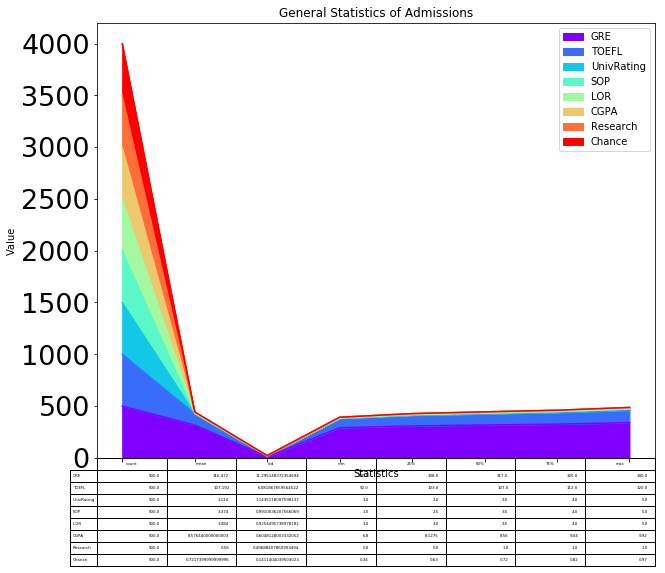

In [47]:
admit.describe().plot(kind='area', fontsize=27, figsize=(10, 8),  table=True, colormap="rainbow")
plt.xlabel("Statistics")
plt.ylabel("Value")
plt.title("General Statistics of Admissions")

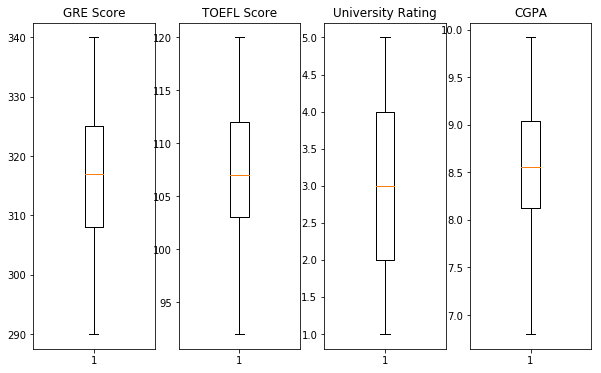

In [0]:
plt.figure(1, figsize=(10,6))

plt.subplot(1,4,1)
plt.boxplot(admit['GRE'])
plt.title('GRE Score')

plt.subplot(1,4,2)
plt.boxplot(admit['TOEFL'])
plt.title('TOEFL Score')

plt.subplot(1,4,3)
plt.boxplot(admit['UnivRating'])
plt.title('University Rating')

plt.subplot(1,4,4)
plt.boxplot(admit['CGPA'])
plt.title('CGPA')

plt.show()

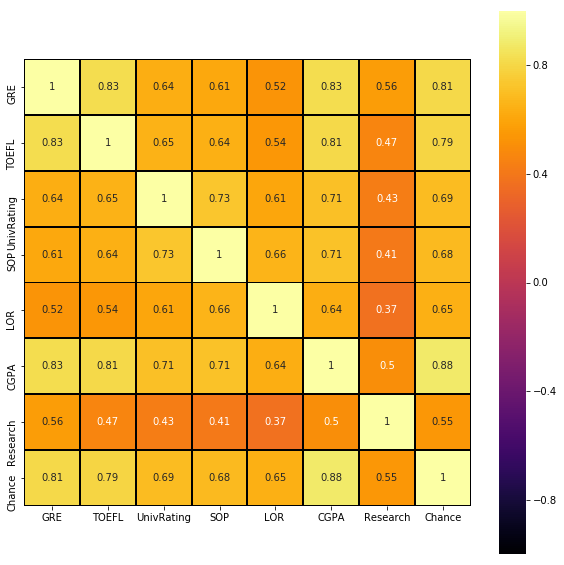

In [0]:
fig = plt.gcf()
fig.set_size_inches(10,10)
fig = sns.heatmap(admit.corr(), annot=True, cmap="inferno", linewidths=1,linecolor="k",square=True,mask=False,vmin=-1,vmax=1,cbar_kws={"orientation":"vertical"},cbar=True)

In [0]:
cor = admit.corr()["Chance"]

cor

GRE           0.810351
TOEFL         0.792228
UnivRating    0.690132
SOP           0.684137
LOR           0.645365
CGPA          0.882413
Research      0.545871
Chance        1.000000
Name: Chance, dtype: float64

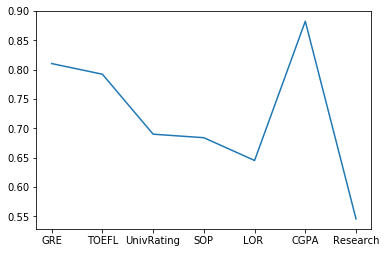

In [0]:
plt.plot(cor[:-1])

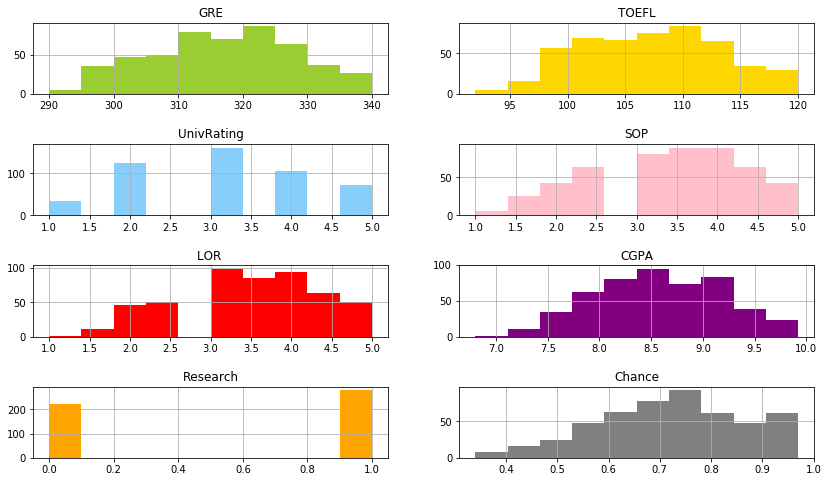

In [0]:
category = ['GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance']
color = ['yellowgreen', 'gold', 'lightskyblue', 'pink', 'red', 'purple', 'orange', 'gray']

start = True

for i in np.arange(4):
  if start==True:
    fig = plt.figure(figsize=(14,8))
    start = False
  
  plt.subplot2grid((4,2),(i,0))
  admit[category[2*i]].hist(color=color[2*i],bins=10)
  plt.title(category[2*i])
  
  plt.subplot2grid((4,2),(i,1))
  admit[category[2*i+1]].hist(color=color[2*i+1], bins=10)
  plt.title(category[2*i+1])
  
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()

In [0]:
print('Mean CGPA Score is :',int(admit[admit['CGPA']<=500].CGPA.mean()))
print('Mean GRE Score is :',int(admit[admit['GRE']<=500].GRE.mean()))
print('Mean TOEFL Score is :',int(admit[admit['TOEFL']<=500].TOEFL.mean()))
print('Mean University rating is :',int(admit[admit['UnivRating']<=500].UnivRating.mean()))

Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean TOEFL Score is : 107
Mean University rating is : 3


Total students 500
Students having research experience 280
Students not having research experience 220


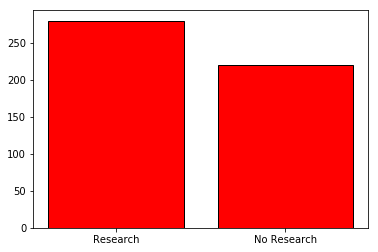

In [0]:
a = len(admit[admit['Research']==1])
b = len(admit[admit['Research']==0])
print(f"Total students {a+b}")
print(f"Students having research experience {a}")
print(f"Students not having research experience {b}")

plt.bar(['Research', 'No Research'], [a, b], color='red', edgecolor='k',align='center')
plt.show()

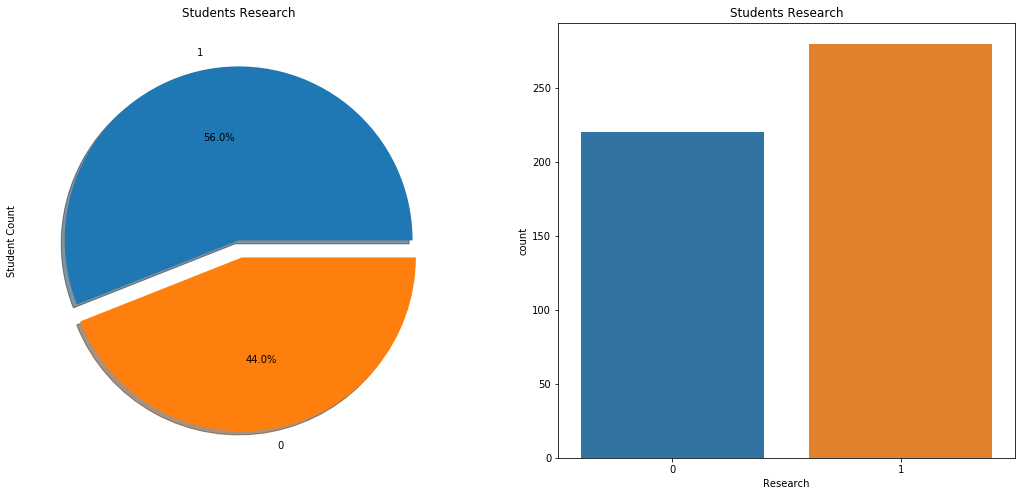

In [0]:
f, ax = plt.subplots(1,2,figsize=(18,8))
admit['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')

sns.countplot('Research', data=admit,ax=ax[1])
ax[1].set_title('Students Research')
plt.show()

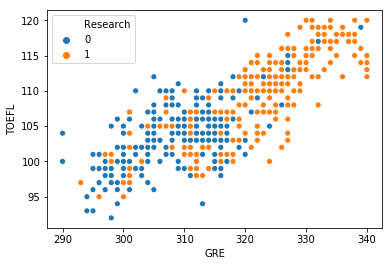

In [0]:
sns.scatterplot(data=admit,x='GRE',y='TOEFL',hue='Research')
plt.show()

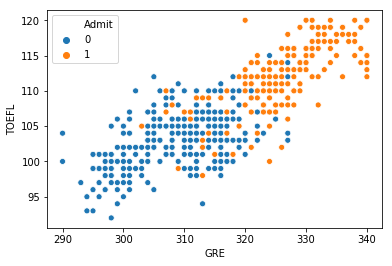

In [0]:
def modify(row):
  if row['Chance'] > 0.75:
    return 1
  else:
    return 0

admit['Admit'] = admit.apply(modify, axis=1)
admittemp = admit.drop(['Chance'], axis=1)

# sns.pairplot(admittemp,hue='Admit')

sns.scatterplot(data=admittemp,x='GRE',y='TOEFL',hue='Admit')

plt.show()

del admittemp

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


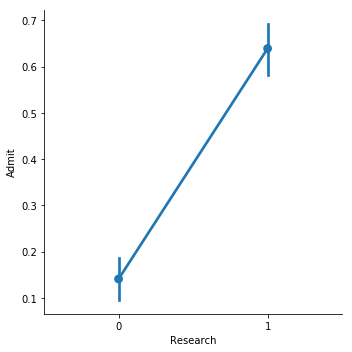

In [0]:
sns.factorplot('Research', 'Admit', data=admit)
plt.show()

In [0]:
admit_sort = admit.sort_values(by=admit.columns[-1],ascending=False)
admit_sort.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
258,326,102,4,5.0,5.0,8.76,1,0.77,1
256,309,99,3,4.0,4.0,8.56,0,0.76,1
255,307,110,4,4.0,4.5,8.37,0,0.79,1
254,321,114,4,4.0,5.0,9.12,0,0.85,1


In [0]:
admit_sort[(admit_sort['Chance']>0.9)].mean().reset_index()

,index,0
0,GRE,332.852459
1,TOEFL,116.213115
2,UnivRating,4.655738
3,SOP,4.549180
4,LOR,4.516393
5,CGPA,9.523443
6,Research,1.000000
7,Chance,0.935574
8,Admit,1.000000


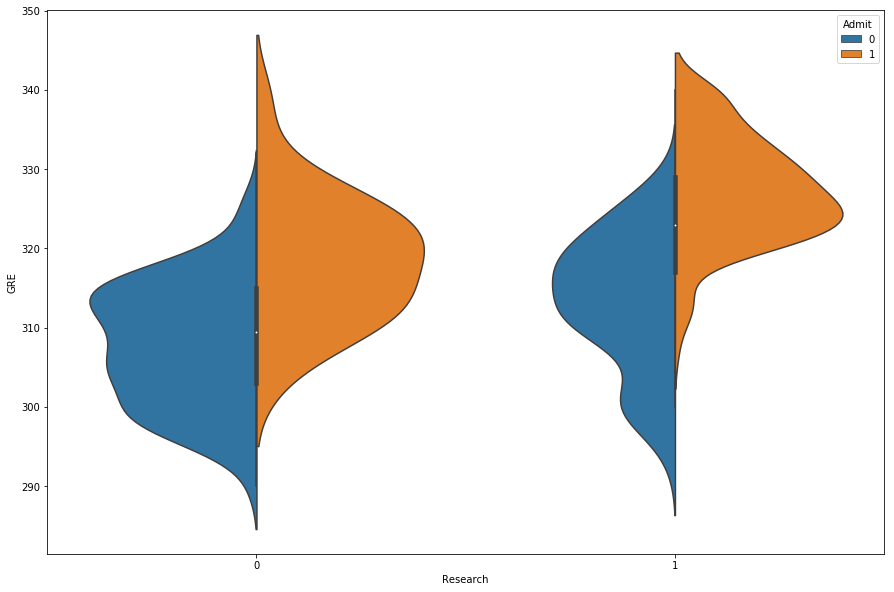

In [0]:
plt.figure(figsize=(15,10))

sns.violinplot("Research", 'GRE',hue='Admit',data=admit,split=True)

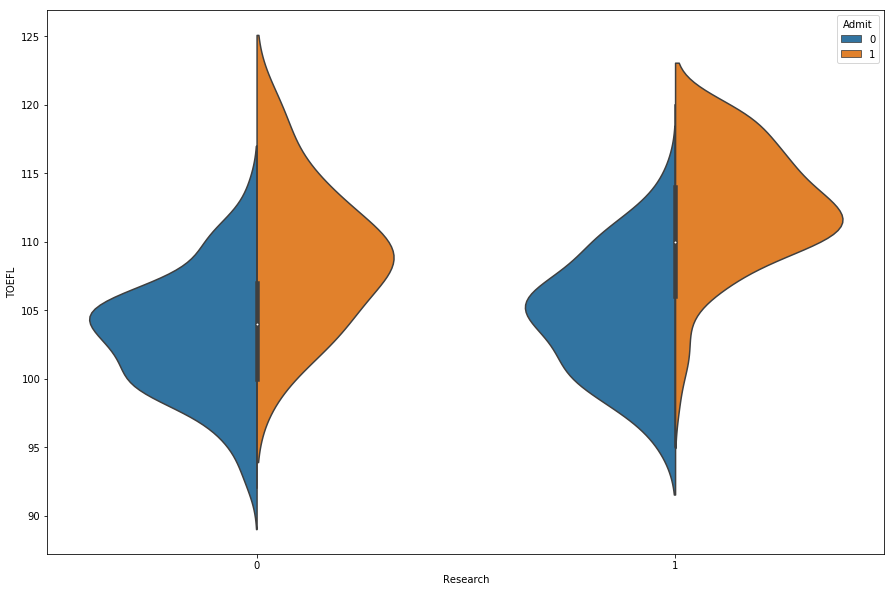

In [0]:
plt.figure(figsize=(15,10))

sns.violinplot("Research", 'TOEFL',hue='Admit',data=admit,split=True)

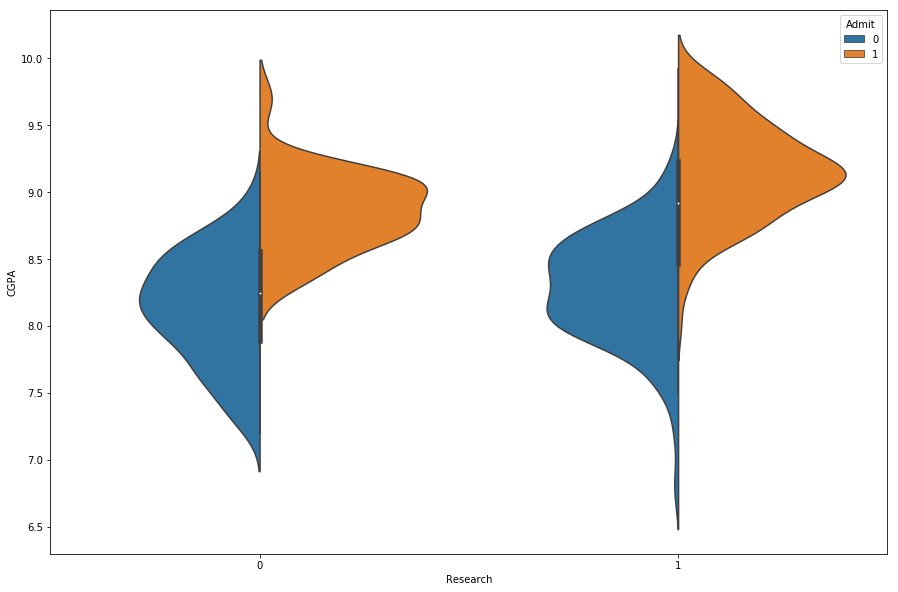

In [0]:
plt.figure(figsize=(15,10))

sns.violinplot("Research", 'CGPA',hue='Admit',data=admit,split=True)

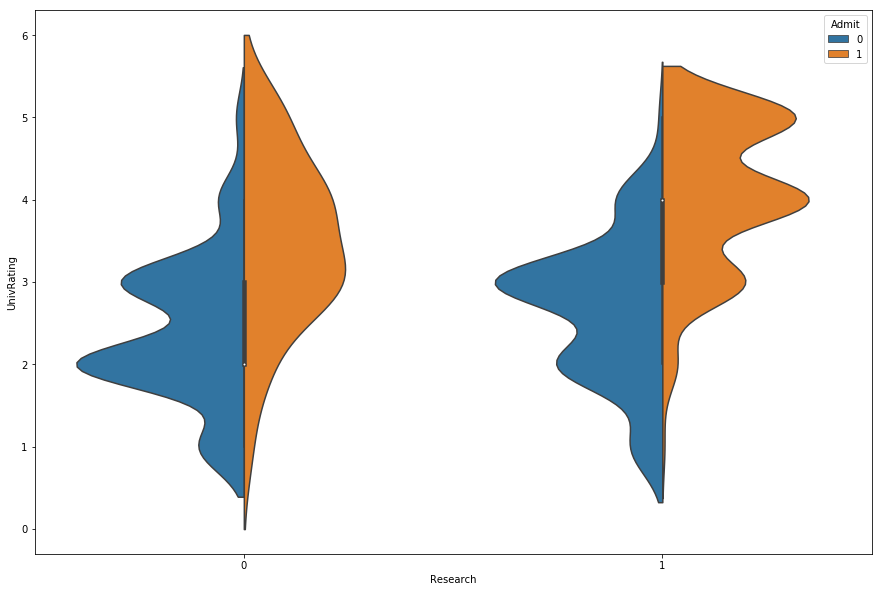

In [0]:
plt.figure(figsize=(15,10))

sns.violinplot("Research", 'UnivRating',hue='Admit',data=admit,split=True)

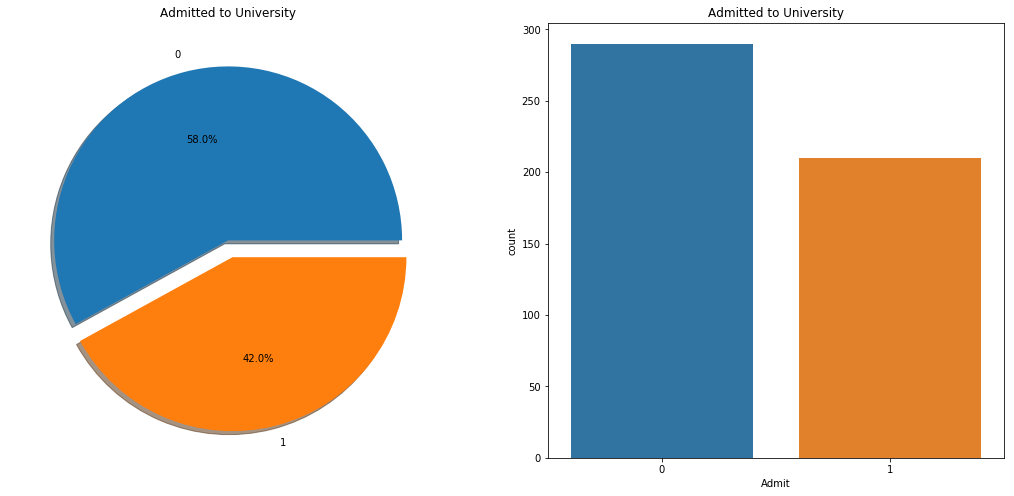

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
admit['Admit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Admitted to University')
ax[0].set_ylabel('')
sns.countplot('Admit',data=admit,ax=ax[1])
ax[1].set_title('Admitted to University')
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [0]:
X = admit.iloc[:,:-2].values
X[0]

array([337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ])

In [0]:
y = admit.iloc[:,-2].values
y[0]

0.92

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05,random_state=0)

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [0]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
pred1 = reg.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, pred1)}")



Mean Squared Error: 0.002318744234133008


In [0]:
y_test

array([0.64, 0.85, 0.8 , 0.91, 0.68, 0.54, 0.54, 0.65, 0.52, 0.79, 0.65,
       0.74, 0.64, 0.79, 0.89, 0.43, 0.81, 0.73, 0.8 , 0.58, 0.57, 0.74,
       0.6 , 0.93, 0.88])

In [0]:
pred1

array([0.65681504, 0.82967416, 0.77745486, 0.87514165, 0.60939091,
       0.64804171, 0.53550954, 0.69668941, 0.52976885, 0.74191947,
       0.613215  , 0.71123893, 0.62206105, 0.75758328, 0.87807215,
       0.5190342 , 0.81852056, 0.63993174, 0.7623532 , 0.53525166,
       0.51876318, 0.71724606, 0.52357412, 0.91784037, 0.83612765])

In [0]:
scores = ['337', '118', '4', '4.5','4.5','9.65','1']
scores=pd.DataFrame(scores).T
chance = reg.predict(scores)
chance

array([0.95074703])

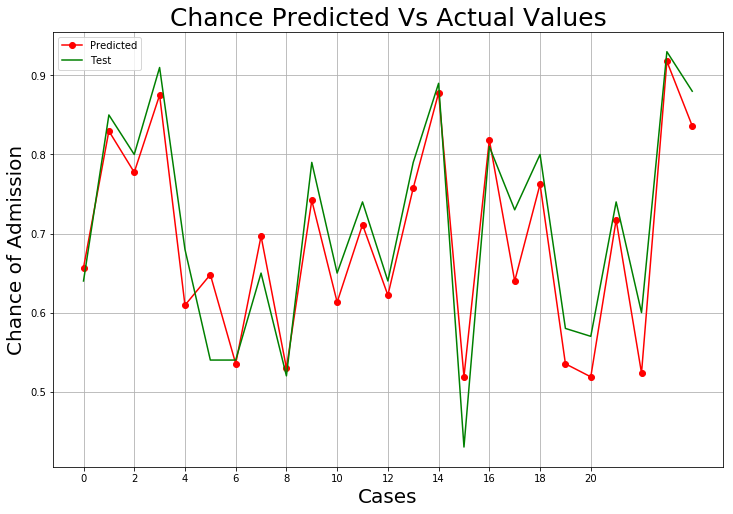

In [0]:
plt.figure(figsize=(12,8))
y=pred1
y1=y_test
x=np.arange(1, 21, 1)
x1=np.arange(0,21,2)
plt.plot(y,color='r',marker='o',label='Predicted')
plt.plot(y1,color='g',label='Actual')
plt.xticks(x1)
plt.gca().legend(('Predicted','Test'))
plt.xlabel('Cases',fontsize=20)
plt.ylabel('Chance of Admission',fontsize=20)
plt.title('Chance Predicted Vs Actual Values',fontsize=25)
plt.grid()
plt.ioff()
# y.shape

In [0]:
admit.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


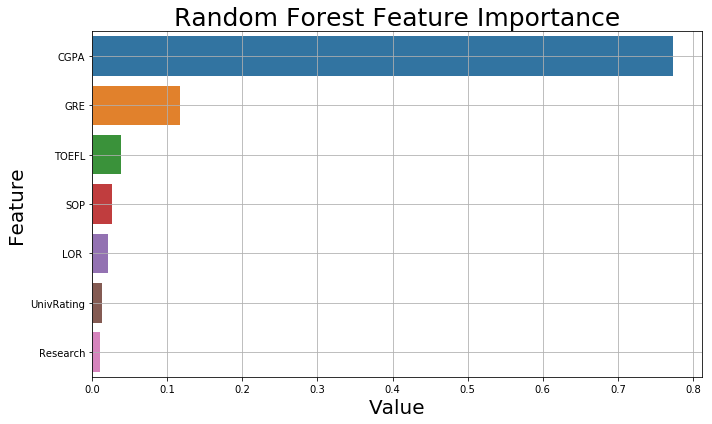

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
columns = ['Admit']
admit.drop(columns, inplace=True, axis=1)
X = admit.drop('Chance',axis = 1)
y = admit['Chance']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25,random_state = 123)
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
rf_model.fit(X_train,y_train)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xlabel('Value',fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=25)
plt.grid()
plt.ioff()
plt.tight_layout()

In [0]:
import joblib

In [0]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
joblib.dump(reg, 'gradLR.joblib')

['gradLR.joblib']

In [0]:
from google.colab import files
files.download('gradLR.joblib')